In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time

In [3]:
ser = Service('./pandas/chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [4]:
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
driver.get(url)

In [9]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>유튜브 랭킹 1 페이지</title>
<link href="https://youtube-rank.com/css/default.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/bootstrap.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/nifty.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/themes/type-c/theme-well-red.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?191202" rel="stylesheet"/>
<link href="https://unpkg.com/aos@2.3.1/dist/aos.css" rel="stylesheet"/>
<link href="/img/apple-touch

In [7]:
#['음악/댄스', '가수명', '구독자수', 'View 수', '동영상수']

In [11]:
songs = soup.select('form > table > tbody > tr')

# len(songs)

# songs[0]



<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLSWxQF3kaqYMX1MWVVzNkNZaM-3EU551f2orOqykA=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLSWxQF3kaqYMX1MWVVzNkNZaM-3EU551f2orOqykA=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [30]:
%%time
#['음악/댄스', '가수명', '구독자수', 'View 수', '동영상수']

# song = songs[0]
category = song.select('p.category')[0].text.strip()
singer = song.select('h1 > a')[0].text.strip()
subscriber = song.select('td.subscriber_cnt')[0].text
view = song.select('td.view_cnt')[0].text
video = song.select('td.video_cnt')[0].text



Wall time: 4.46 ms


In [32]:
songs = soup.select('form > table > tbody > tr')
songs_list = []
rank = 1

for song in songs:
    category = song.select('p.category')[0].text.strip()
    singer = song.select('h1 > a')[0].text.strip()
    subscriber = song.select('td.subscriber_cnt')[0].text
    view = song.select('td.view_cnt')[0].text
    video = song.select('td.video_cnt')[0].text
    mylist = [rank, category, singer, subscriber, view, video]
    rank += 1
    songs_list.append(mylist)

print(songs_list)

[[1, '[음악/댄스/가수]', 'BLACKPINK', '7130만', '220억2860만', '395개'], [2, '[음악/댄스/가수]', 'HYBE LABELS', '6360만', '210억1371만', '786개'], [3, '[음악/댄스/가수]', 'BANGTANTV', '6290만', '146억8130만', '1,665개'], [4, '[음악/댄스/가수]', 'SMTOWN', '2970만', '234억3321만', '3,841개'], [5, '[키즈/어린이]', 'Boram Tube Vlog [보람튜브 브이로그]', '2650만', '110억5288만', '223개'], [6, '[음악/댄스/가수]', '1MILLION Dance Studio', '2470만', '70억0543만', '3,517개'], [7, '[음악/댄스/가수]', '1theK (원더케이)', '2380만', '215억4518만', '15,835개'], [8, '[음악/댄스/가수]', 'JYP Entertainment', '2340만', '153억5057만', '1,435개'], [9, '[음악/댄스/가수]', 'Mnet K-POP', '1920만', '142억1584만', '27,027개'], [10, '[TV/방송]', 'KBS WORLD TV', '1740만', '130억6970만', '54,764개'], [11, '[음악/댄스/가수]', 'JFlaMusic', '1740만', '35억3017만', '282개'], [12, '[음식/요리/레시피]', 'Jane ASMR 제인', '1580만', '56억9872만', '1,338개'], [13, '[음악/댄스/가수]', 'officialpsy', '1540만', '89억1662만', '91개'], [14, '[음악/댄스/가수]', 'BIGBANG', '1400만', '68억8615만', '773개'], [15, '[음악/댄스/가수]', 'TWICE', '1290만', '28억7342만', '727개'], [16, '[음식/요리

In [136]:
df_songs_list = pd.DataFrame(songs_list,
                            columns = ['rank', 'category', 'singer', 'subscriber', 'view', 'video'])

df_songs_list.to_excel('./pandas/3_Data_Analysis_Exercise/Chapter_3_2/files/youtube_rank_prac.xlsx',
                      index = False)

In [137]:
from matplotlib import rc, font_manager

In [138]:
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
# font_name
rc('font', family = font_name)

In [139]:
df = pd.read_excel('./pandas/3_Data_Analysis_Exercise/Chapter_3_2/files/youtube_rank_prac.xlsx')
df.head()

,rank,category,singer,subscriber,view,video
0,1,[음악/댄스/가수],BLACKPINK,7130만,220억2860만,395개
1,2,[음악/댄스/가수],HYBE LABELS,6360만,210억1371만,786개
2,3,[음악/댄스/가수],BANGTANTV,6290만,146억8130만,"1,665개"
3,4,[음악/댄스/가수],SMTOWN,2970만,234억3321만,"3,841개"
4,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개


In [140]:
df['category'].value_counts()

[음악/댄스/가수]     37
[키즈/어린이]       22
[음식/요리/레시피]    14
[TV/방송]        13
[뉴스/정치/사회]      3
[BJ/인물/연예인]     3
[애완/반려동물]       2
[해외]            1
[미분류]           1
[회사/오피셜]        1
[패션/미용]         1
[게임]            1
[취미/라이프]        1
Name: category, dtype: int64

In [141]:
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rank                 100 non-null    int64 
 1   category             100 non-null    object
 2   singer               100 non-null    object
 3   subscriber           100 non-null    object
 4   view                 100 non-null    object
 5   video                100 non-null    object
 6   replaced_subscriber  100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [142]:
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rank                 100 non-null    int64 
 1   category             100 non-null    object
 2   singer               100 non-null    object
 3   subscriber           100 non-null    object
 4   view                 100 non-null    object
 5   video                100 non-null    object
 6   replaced_subscriber  100 non-null    int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 5.2+ KB


In [143]:
df.head()

,rank,category,singer,subscriber,view,video,replaced_subscriber
0,1,[음악/댄스/가수],BLACKPINK,7130만,220억2860만,395개,71300000
1,2,[음악/댄스/가수],HYBE LABELS,6360만,210억1371만,786개,63600000
2,3,[음악/댄스/가수],BANGTANTV,6290만,146억8130만,"1,665개",62900000
3,4,[음악/댄스/가수],SMTOWN,2970만,234억3321만,"3,841개",29700000
4,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000


In [144]:
pivot_df = df.pivot_table(values = 'replaced_subscriber',
              index = 'category',
              aggfunc = ['sum','count'])
pivot_df

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],13570000,3
[TV/방송],87520000,13
[게임],4260000,1
[뉴스/정치/사회],20430000,3
[미분류],6550000,1
[애완/반려동물],8080000,2
[음식/요리/레시피],92900000,14
[음악/댄스/가수],535880000,37


In [145]:
pivot_df.columns = ['subscriber_sum', 'sumbscriber_count']
pivot_df = pivot_df.reset_index()
pivot_df

,category,subscriber_sum,sumbscriber_count
0,[BJ/인물/연예인],13570000,3
1,[TV/방송],87520000,13
2,[게임],4260000,1
3,[뉴스/정치/사회],20430000,3
4,[미분류],6550000,1
5,[애완/반려동물],8080000,2
6,[음식/요리/레시피],92900000,14
7,[음악/댄스/가수],535880000,37
8,[취미/라이프],4000000,1
9,[키즈/어린이],163730000,22


In [157]:
pivot_df = pivot_df.sort_values(by = 'subscriber_sum',
                               ascending = False)
pivot_df.reset_index(drop = True, inplace = True)
pivot_df

,category,subscriber_sum,sumbscriber_count
0,[음악/댄스/가수],535880000,37
1,[키즈/어린이],163730000,22
2,[음식/요리/레시피],92900000,14
3,[TV/방송],87520000,13
4,[뉴스/정치/사회],20430000,3
5,[BJ/인물/연예인],13570000,3
6,[애완/반려동물],8080000,2
7,[해외],7810000,1
8,[미분류],6550000,1
9,[회사/오피셜],5950000,1


In [158]:
pivot_df.head(6)

,category,subscriber_sum,sumbscriber_count
0,[음악/댄스/가수],535880000,37
1,[키즈/어린이],163730000,22
2,[음식/요리/레시피],92900000,14
3,[TV/방송],87520000,13
4,[뉴스/정치/사회],20430000,3
5,[BJ/인물/연예인],13570000,3


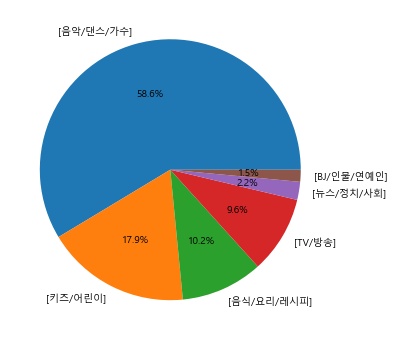

In [162]:
plt.rcParams['font.size'] = 10
plt.figure(figsize = (6,6))
plt.pie(pivot_df.head(6)['subscriber_sum'],
       labels = pivot_df.head(6)['category'],
       autopct = '%.1f%%')
plt.show()

In [107]:
import matplotlib.pyplot as plt

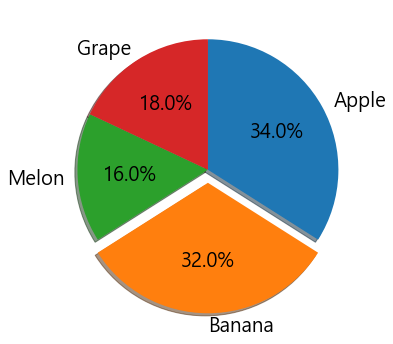

In [131]:

## pie
plt.rcParams['font.size'] = 20
ratio = [34,32,16,18]
labels = ['Apple','Banana','Melon','Grape']
explodes = [0,0.1,0,0]
# colors = ['#']

plt.figure(figsize = (6,6))
plt.pie(ratio, labels = labels,
       autopct = '%.1f%%', counterclock = False,
       startangle = 90, explode = explodes, shadow = True,
#        colors = colors
       )
plt.show()